**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

*   NOMBRE: Marcos Eduardo García Ortiz
*   MATRÍCULA: A01276213

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
DIR = "/content/drive/MyDrive/Maestria/Primer Trimstre/Ciencia de datos/Actividades/Actividad 7"
os.chdir(DIR)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [ ]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [ ]:
cereals_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(6), object(3)
memory usage: 9.8+ KB


In [ ]:
cereals_df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [ ]:
cereals_df.describe(include='object')

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

<Axes: xlabel='mfr', ylabel='count'>

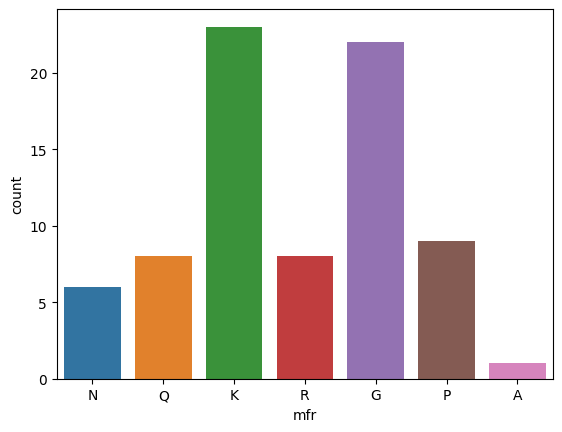

In [ ]:
sns.countplot(data=cereals_df, x='mfr')

<Axes: xlabel='shelf', ylabel='count'>

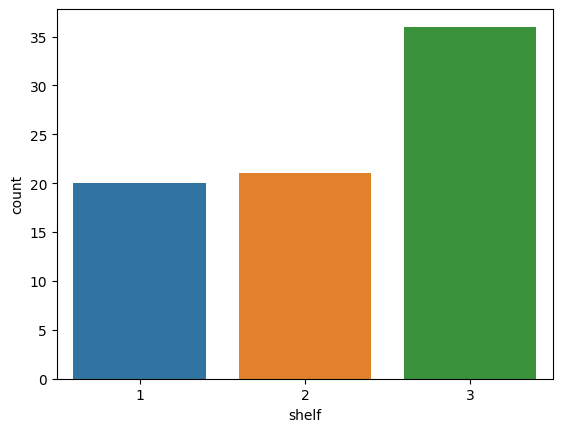

In [ ]:
sns.countplot(data=cereals_df, x='shelf')

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.

<Axes: xlabel='mfr', ylabel='count'>

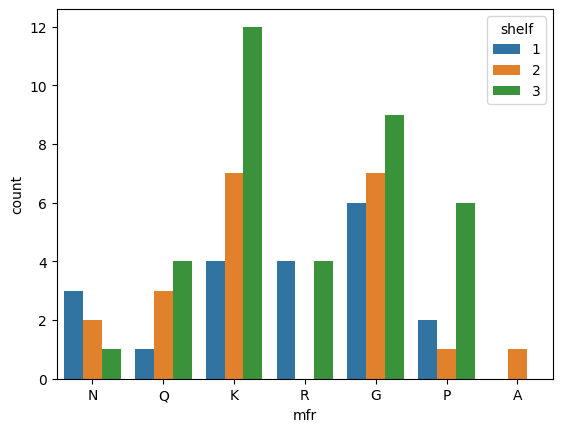

In [ ]:
sns.countplot(data=cereals_df,x='mfr', hue='shelf')

 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

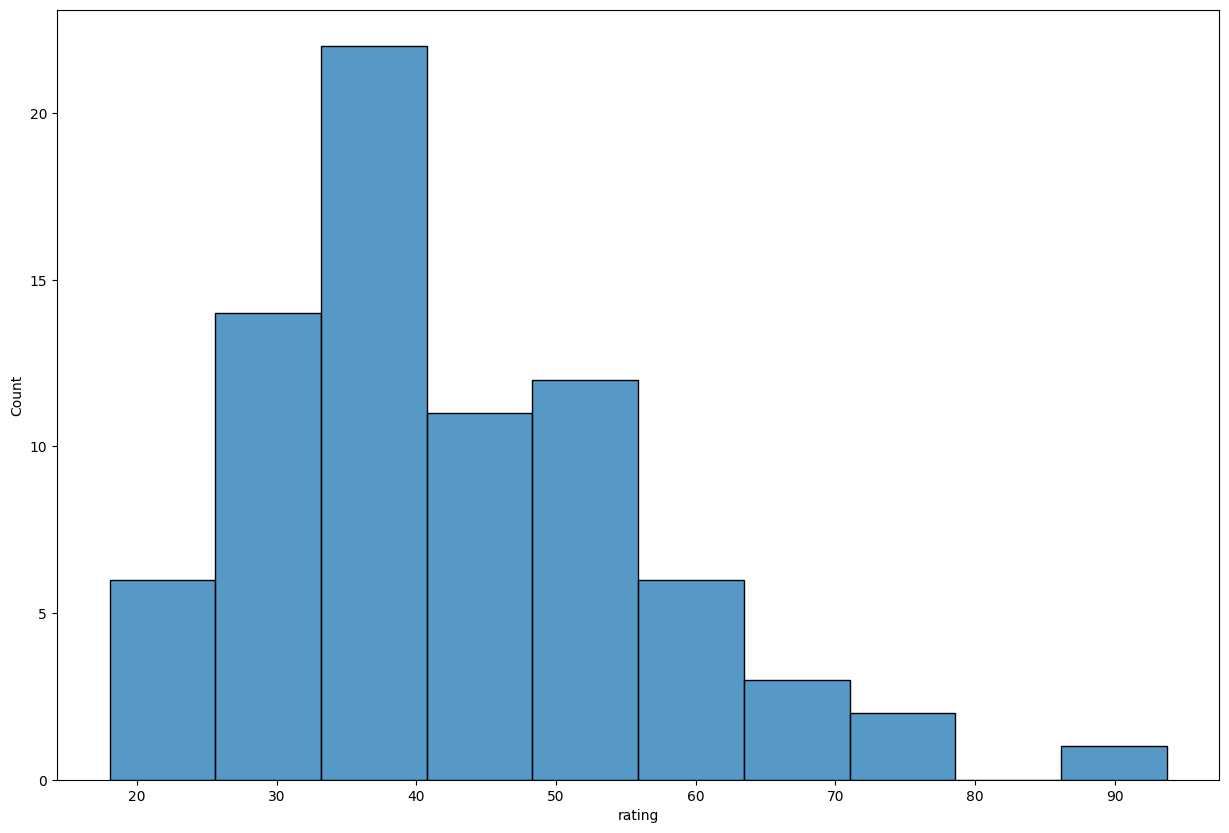

In [ ]:
plt.figure(figsize=(15, 10))
hist = sns.histplot(data=cereals_df, x='rating')

3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

In [ ]:
cereals_df.sort_values('rating', ascending=False)[['name','mfr','rating']][:10]

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

<Axes: xlabel='mfr', ylabel='calories'>

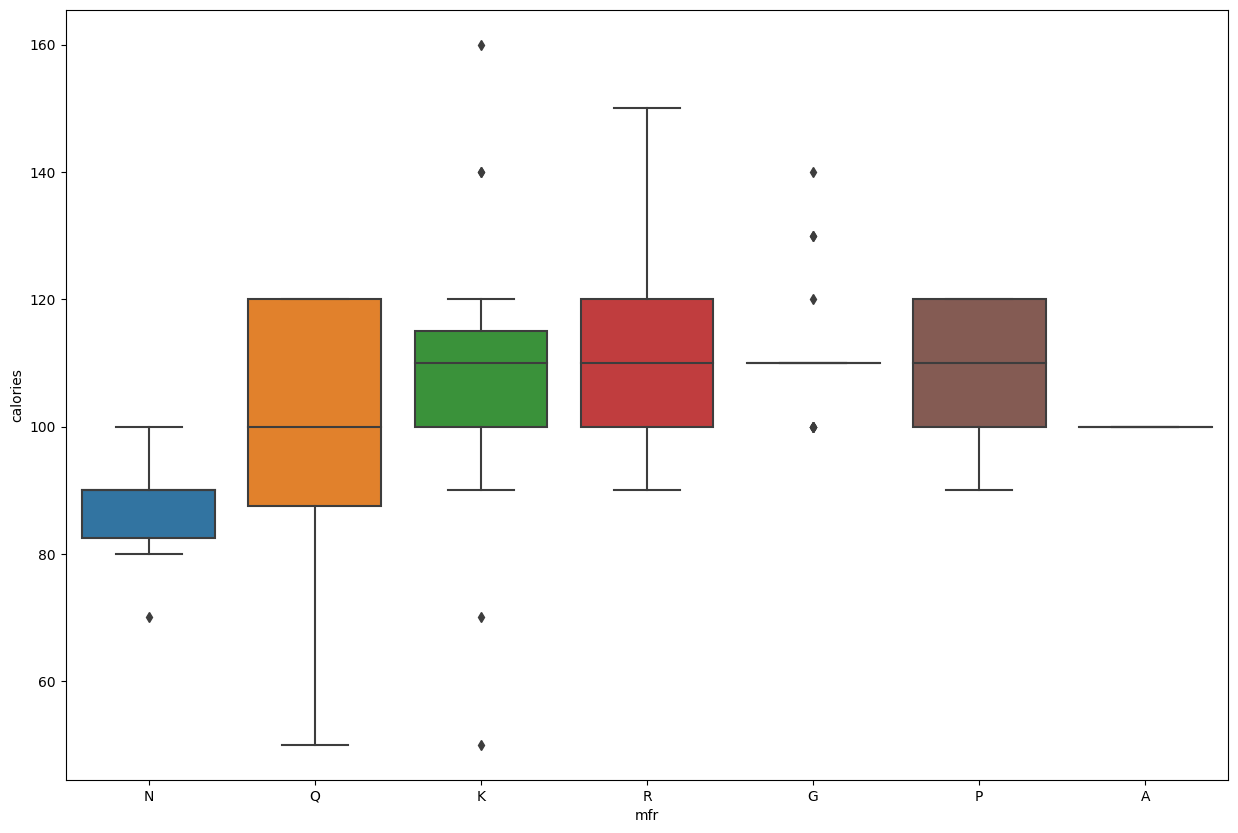

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(cereals_df, y='calories', x='mfr')

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

Fiber y Protein son las variables que tienen la mayor correlación con `rating`

<Axes: >

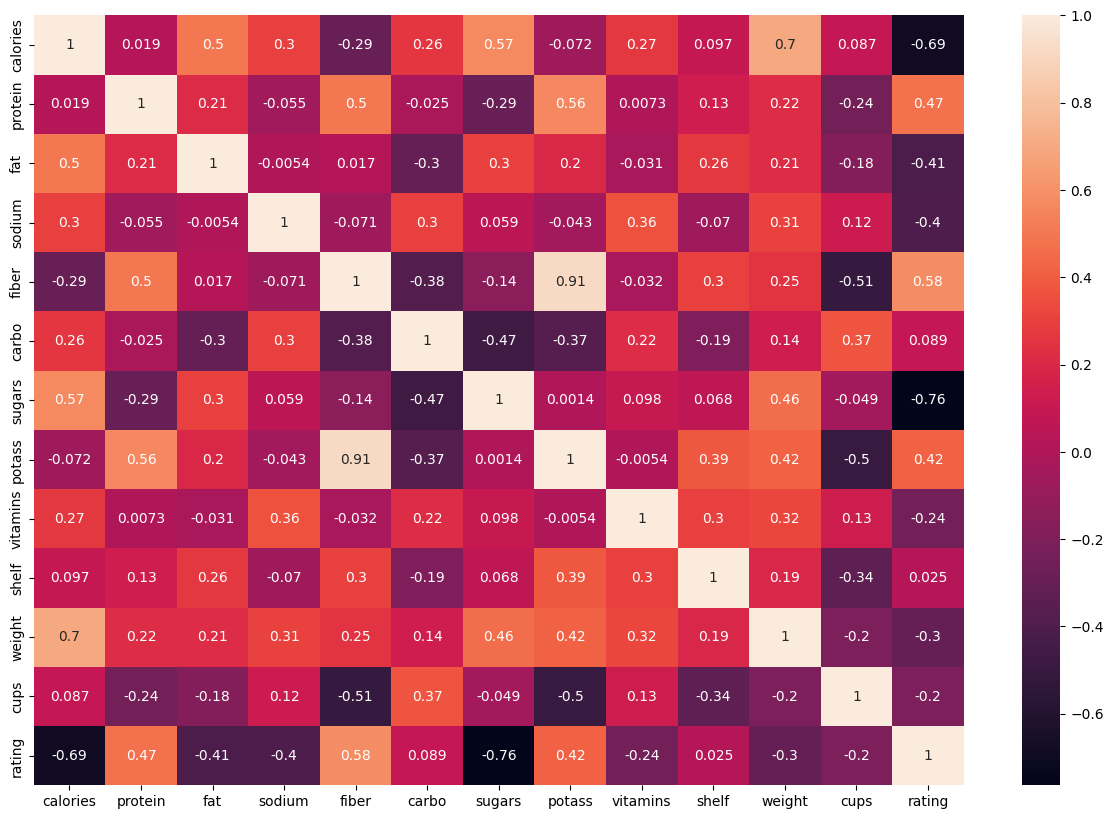

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(cereals_df.corr(numeric_only=True), annot=True)

5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [ ]:
cereals_df.dropna(inplace=True)
cereals_df.reset_index(drop=True, inplace=True)
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [ ]:
y = cereals_df['rating']
x = cereals_df.select_dtypes(include='number')
x.drop(['rating'], axis='columns', inplace=True)
total_components = x.shape[1]
total_components

12

In [ ]:
# Escalando los datos
from sklearn.preprocessing import StandardScaler
escalar = StandardScaler()
x_scaled = escalar.fit_transform(x)
x_scaled[0:5]

array([[-1.87865227,  1.3911796 ,  0.        , -0.39369182,  3.25070642,
        -2.51720557, -0.25594026,  2.57800107, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [ 0.65821393,  0.45529514,  4.        , -1.79257173, -0.0729865 ,
        -1.74106718,  0.2060007 ,  0.51828763, -1.31209813,  0.94840141,
        -0.20220332,  0.76191901],
       [-1.87865227,  1.3911796 ,  0.        ,  1.18765068,  2.8352448 ,
        -1.99977998, -0.48691074,  3.14619788, -0.18308346,  0.94840141,
        -0.20220332, -2.09989497],
       [-2.89339875,  1.3911796 , -1.        , -0.27205009,  4.91255287,
        -1.74106718, -1.64176313,  3.28824708, -0.18308346,  0.94840141,
        -0.20220332, -1.37376306],
       [ 0.15084069, -0.48058932,  1.        ,  0.21451684, -0.28071731,
        -1.0942852 ,  0.66794165, -0.40503219, -0.18308346, -1.47165737,
        -0.20220332, -0.30592203]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
x_projected = pca.fit_transform(x_scaled)
x_projected = pd.DataFrame(x_projected)
x_projected.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,-0.235388,-0.247787,-0.124799,0.046331,0.238706,0.021342
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.489640,0.895201,-0.835394,-0.595071,0.069954,-0.089523
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,-1.210340,0.182089,0.139267,0.090776,-0.488302,-0.035570
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.289695,0.865569,-0.682678,0.099300,0.708471,0.108198
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,-0.493652,-0.808361,-0.712896,-0.100511,0.093129,-0.076342


In [ ]:
for i in range(0, total_components):
  print("The percentage of variance explained by principal component", i+1, "is", format(pca.explained_variance_ratio_[i]*100,'.2f'),'%')

The percentage of variance explained by principal component 1 is 27.66 %
The percentage of variance explained by principal component 2 is 22.06 %
The percentage of variance explained by principal component 3 is 14.88 %
The percentage of variance explained by principal component 4 is 8.48 %
The percentage of variance explained by principal component 5 is 8.20 %
The percentage of variance explained by principal component 6 is 5.75 %
The percentage of variance explained by principal component 7 is 5.50 %
The percentage of variance explained by principal component 8 is 3.47 %
The percentage of variance explained by principal component 9 is 2.61 %
The percentage of variance explained by principal component 10 is 0.76 %
The percentage of variance explained by principal component 11 is 0.47 %
The percentage of variance explained by principal component 12 is 0.15 %


In [ ]:
np.cumsum(pca.explained_variance_ratio_)

array([0.2766149 , 0.49721239, 0.64604788, 0.7308454 , 0.81286864,
       0.87035019, 0.92533733, 0.96000956, 0.98615378, 0.99380355,
       0.99849465, 1.        ])

7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

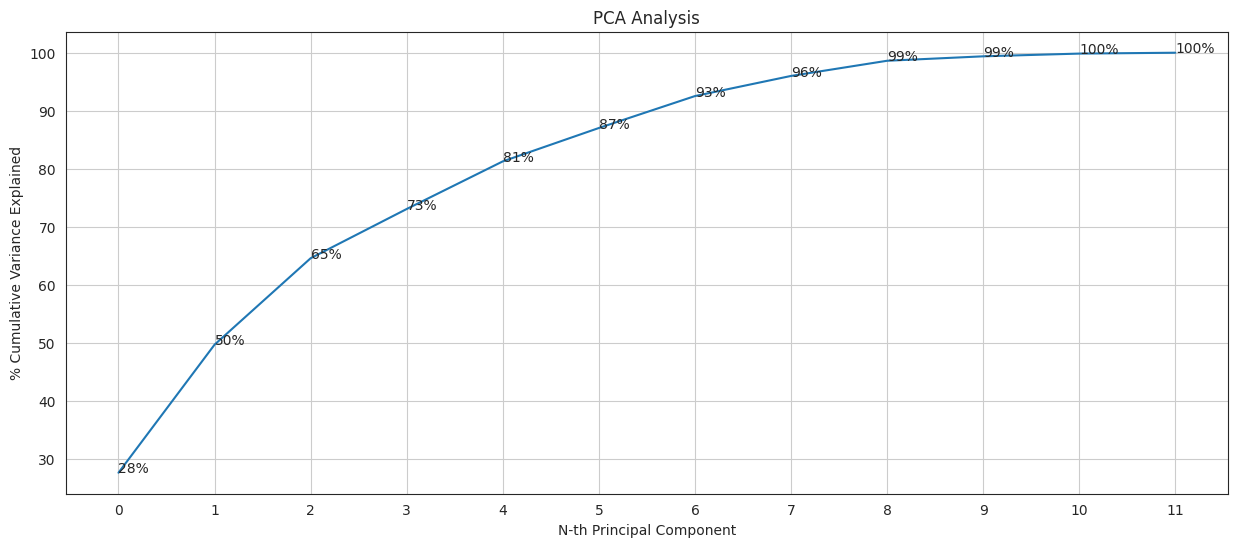

In [ ]:
sns.set_style('white')
plt.figure(figsize=(15,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.title('PCA Analysis')
plt.xlabel('N-th Principal Component')
plt.ylabel('% Cumulative Variance Explained')
plt.xticks(np.arange(0,total_components,1))
plt.grid()

labels = np.cumsum(pca.explained_variance_ratio_)*100
for i in range(total_components):
  plt.text(i,labels[i],str(format(labels[i],'.0f'))+'%')

In [ ]:
num_components = 6
pc_df = pd.DataFrame(abs(pca.components_[:num_components]), columns = x.columns, index=['Principal component {}'.format(i) for i in range(1, num_components + 1)])
pc_df

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups
Principal component 1,0.036594,0.330888,0.212549,0.050894,0.458623,0.268609,0.081440,0.502603,0.018839,0.308929,0.257160,0.371154
Principal component 2,0.571142,0.045367,0.249143,0.304684,0.201029,0.175660,0.364844,0.070345,0.300574,0.065114,0.448962,0.106553
Principal component 3,0.077927,0.326405,0.291274,0.343108,0.173912,0.513002,0.495338,0.130460,0.327563,0.000546,0.122030,0.082695
Principal component 4,0.164032,0.281265,0.124324,0.168916,0.075295,0.071305,0.016033,0.112708,0.594798,0.667703,0.160396,0.030683
Principal component 5,0.186667,0.372134,0.597422,0.292344,0.229653,0.191830,0.360371,0.124888,0.105582,0.265485,0.232905,0.115826
Principal component 6,0.196806,0.176822,0.299822,0.462005,0.084635,0.446257,0.061289,0.068499,0.279949,0.133268,0.316544,0.464295


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?


Text(0, 0.5, 'feature importance for PC1')

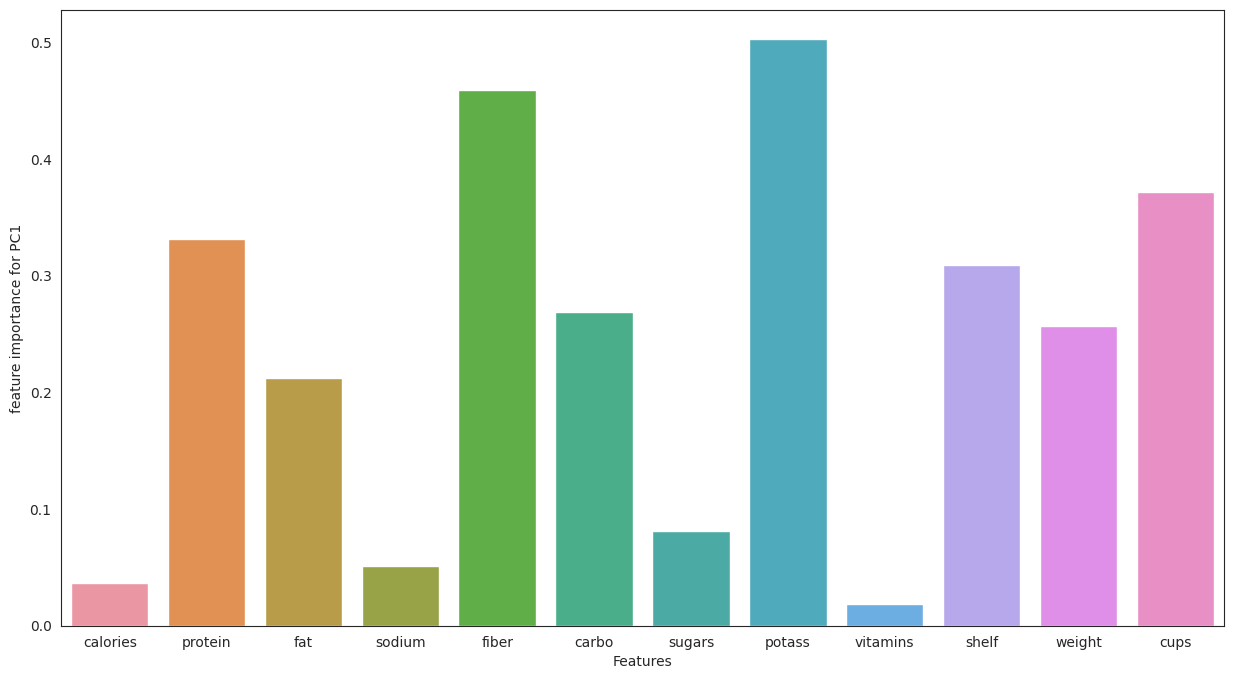

In [ ]:
plt.figure(figsize=(15,8))
sns.barplot(data=pc_df.iloc[0:1])
plt.xlabel('Features')
plt.ylabel('feature importance for PC1')

9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

Las variables de type y mfr representan las variables que pueden ser predictores la variable categorica name no nos brinda información relevante pues todos sus  valores son únicos

Debido a que son variables de baja cardinalidad el metodo escogido para codificarlas sera one hot encoding

In [ ]:
cereals_df.describe(include='object')

,name,mfr,type
count,74,74,74
unique,74,7,2
top,100%_Bran,K,C
freq,1,23,73


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# define one hot encoding
encoder = OneHotEncoder(drop='first',sparse_output=False)
few_cardinal_variables = ['mfr','type', 'shelf']
# transform data
onehot_df = encoder.fit_transform(cereals_df[few_cardinal_variables])
onehot_df = pd.DataFrame(onehot_df, columns=encoder.get_feature_names_out())
onehot_df

,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,shelf_2,shelf_3
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
70,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
71,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [ ]:
# As the cumulative percentage variance for principal components 1 and 2 is 96%, only their projections will be used in the new dataset
new_data = x_projected.iloc[:,0:num_components]
# Assign names to projections on components
new_data.columns = ['PC{}'.format(i) for i in range(1, num_components + 1)]
new_data = pd.concat([new_data,onehot_df,y], axis=1)
new_data

,PC1,PC2,PC3,PC4,PC5,PC6,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,shelf_2,shelf_3,rating
0,4.870399,2.934238,-0.055266,0.244647,-1.102035,0.904575,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,68.402973
1,1.761110,-0.210993,-3.014058,-0.494129,3.275506,1.065041,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,33.983679
2,4.727161,2.402254,0.869028,-0.095823,-1.357388,1.393861,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,59.425505
3,5.142814,4.401826,1.883153,0.209854,-1.662387,0.955808,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,93.704912
4,-0.332394,-0.284619,-1.490929,-0.944313,-0.311262,0.828872,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-1.059199,-0.475067,1.161330,0.495373,0.749484,-0.773891,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,39.106174
70,-1.595568,-0.574653,-1.671901,0.380863,-0.489233,0.116453,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27.753301
71,-0.134252,0.612590,1.181098,-1.357046,-0.190222,0.163728,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,49.787445
72,-0.674537,0.568589,1.163186,-1.330649,0.088594,0.644712,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.592193


In [ ]:
new_data.to_csv('cereals_afterPCA.csv')